In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patheffects import withStroke
from flexitext import flexitext


In [2]:
pep_df = pd.read_csv('/Users/sebastianlorenzen-schmidt/neuefische/capstone_project/data/world_primary_energy_production.csv')
cons_df =pd.read_csv('/Users/sebastianlorenzen-schmidt/neuefische/capstone_project/data/fossil_consumption_diff_updated.csv')
gdp_df = pd.read_csv('/Users/sebastianlorenzen-schmidt/neuefische/capstone_project/data/gdp-ppp-current-international-dollar-clean.csv')


In [3]:
pep_df.rename(columns={'location_code':'iso_code'},inplace=True)


In [4]:
merge1_df = pep_df.merge(cons_df, how= 'inner', on = ['year','iso_code'])

In [5]:
merge1_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4995 entries, 0 to 4994
Data columns (total 45 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0_x                  4995 non-null   int64  
 1   country_x                     4995 non-null   object 
 2   iso_code                      4995 non-null   object 
 3   world_region                  4995 non-null   object 
 4   year                          4995 non-null   int64  
 5   total_prod                    4995 non-null   float64
 6   coal                          4995 non-null   float64
 7   oil                           4995 non-null   float64
 8   gas                           4995 non-null   float64
 9   nuclear                       4995 non-null   float64
 10  hydroelectricity              4995 non-null   float64
 11  wind                          4995 non-null   float64
 12  biofuel                       4995 non-null   float64
 13  sol

In [6]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8246 entries, 0 to 8245
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  8246 non-null   object 
 1   Country Code  8246 non-null   object 
 2   Year          8246 non-null   int64  
 3   GDP_PPP       7241 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 257.8+ KB


In [7]:
cols = gdp_df.columns.to_list()
cols= [col.lower() for col in cols]
cols= [col.lower() for col in cols]
cols= [col.replace(' ','_') for col in cols]
cols= [col.replace('country_code','iso_code') for col in cols]
gdp_df.columns = cols


gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8246 entries, 0 to 8245
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_name  8246 non-null   object 
 1   iso_code      8246 non-null   object 
 2   year          8246 non-null   int64  
 3   gdp_ppp       7241 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 257.8+ KB


In [8]:
merge2_df = merge1_df.merge(gdp_df, how = 'inner', on = ['iso_code','year'])

merge2_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4806 entries, 0 to 4805
Data columns (total 47 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0_x                  4806 non-null   int64  
 1   country_x                     4806 non-null   object 
 2   iso_code                      4806 non-null   object 
 3   world_region                  4806 non-null   object 
 4   year                          4806 non-null   int64  
 5   total_prod                    4806 non-null   float64
 6   coal                          4806 non-null   float64
 7   oil                           4806 non-null   float64
 8   gas                           4806 non-null   float64
 9   nuclear                       4806 non-null   float64
 10  hydroelectricity              4806 non-null   float64
 11  wind                          4806 non-null   float64
 12  biofuel                       4806 non-null   float64
 13  sol

In [9]:
merge2_df.columns

Index(['Unnamed: 0_x', 'country_x', 'iso_code', 'world_region', 'year',
       'total_prod', 'coal', 'oil', 'gas', 'nuclear', 'hydroelectricity',
       'wind', 'biofuel', 'solar_geothermal_other', 'fossil_fuels',
       'renewables', 'coal_share', 'oil_share', 'gas_share', 'nuclear_share',
       'hydroelectricity_share', 'wind_share', 'biofuel_share',
       'solar_geothermal_other_share', 'fossil_fuel_share', 'renewables_share',
       'fossil_prod_diff', 'Unnamed: 0_y', 'country_y', 'nuclear_consumption',
       'coal_consumption', 'hydro_consumption', 'oil_consumption',
       'gas_consumption', 'wind_consumption', 'solar_consumption',
       'other_renewable_consumption', 'biofuel_consumption',
       'low_carbon_consumption', 'renewables_consumption',
       'fossil_consumption', 'total_consumption', 'fossil_diff',
       'total_cons_diff', 'renewables_diff', 'country_name', 'gdp_ppp'],
      dtype='object')

In [10]:
merge3_df = merge2_df.drop(['Unnamed: 0_x','Unnamed: 0_y','country_y','country_name'],axis = 1)

merge3_df


,country_x,iso_code,world_region,year,total_prod,coal,oil,gas,nuclear,hydroelectricity,...,other_renewable_consumption,biofuel_consumption,low_carbon_consumption,renewables_consumption,fossil_consumption,total_consumption,fossil_diff,total_cons_diff,renewables_diff,gdp_ppp
0,Ethiopia,ETH,Africa,1990,3.108572,0.0,0.0,0.0,0.0,3.108572,...,0.000000,0.0,3.108572,3.108572,12.170373,15.278944,0.000000,0.000000,0.000000,1.986192e+10
1,Ethiopia,ETH,Africa,1991,3.134286,0.0,0.0,0.0,0.0,3.134286,...,0.000000,0.0,3.134286,3.134286,10.071755,13.206041,-2.098617,-2.072903,0.025714,1.906802e+10
2,Ethiopia,ETH,Africa,1992,3.220000,0.0,0.0,0.0,0.0,3.220000,...,0.000000,0.0,3.220000,3.220000,14.647726,17.867726,4.575970,4.661685,0.085714,1.781121e+10
3,Ethiopia,ETH,Africa,1993,3.574286,0.0,0.0,0.0,0.0,3.574286,...,0.000000,0.0,3.574286,3.574286,13.503139,17.077425,-1.144586,-0.790300,0.354286,2.062978e+10
4,Ethiopia,ETH,Africa,1994,3.828571,0.0,0.0,0.0,0.0,3.828571,...,0.000000,0.0,3.828571,3.828571,8.893668,12.722239,-4.609472,-4.355186,0.254286,2.174245e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4801,Guinea,GIN,Africa,2012,1.402571,0.0,0.0,0.0,0.0,1.400000,...,0.002571,0.0,1.402571,1.402571,10.854944,12.257515,-0.555904,-0.335904,0.220000,1.912517e+10
4802,Guinea,GIN,Africa,2013,1.377143,0.0,0.0,0.0,0.0,1.374286,...,0.002857,0.0,1.377143,1.377143,9.517419,10.894562,-1.337525,-1.362954,-0.025429,1.973052e+10
4803,Guinea,GIN,Africa,2014,1.234286,0.0,0.0,0.0,0.0,1.228571,...,0.005714,0.0,1.234286,1.234286,10.039257,11.273543,0.521838,0.378981,-0.142857,2.012241e+10
4804,Guinea,GIN,Africa,2015,1.094286,0.0,0.0,0.0,0.0,1.085714,...,0.008571,0.0,1.094286,1.094286,11.163175,12.257461,1.123918,0.983918,-0.140000,2.079912e+10


In [11]:
merge3_df.rename(columns={'country_x':'country',
                        'coal': 'coal_prod',
                        'oil': 'oil_prod',
                        'gas': 'gas_prod',
                        'nuclear': 'nuclear_prod',
                        'hydroelectricity': 'hydro_prod',
                        'wind': 'wind_prod',
                        'biofuel': 'biofuel_prod',
                        'solar_geothermal_others': 'solar_geothermal_others_prod',
                        'fossil_fuels': 'fossil_prod',
                        'renewables': 'renewables_prod',
                        'fossil_diff': 'fossil_cons_diff',
                        'renewables_diff': 'renewables_cons_diff'},inplace=True)

merge3_df.head()

,country,iso_code,world_region,year,total_prod,coal_prod,oil_prod,gas_prod,nuclear_prod,hydro_prod,...,other_renewable_consumption,biofuel_consumption,low_carbon_consumption,renewables_consumption,fossil_consumption,total_consumption,fossil_cons_diff,total_cons_diff,renewables_cons_diff,gdp_ppp
0,Ethiopia,ETH,Africa,1990,3.108572,0.0,0.0,0.0,0.0,3.108572,...,0.0,0.0,3.108572,3.108572,12.170373,15.278944,0.000000,0.000000,0.000000,1.986192e+10
1,Ethiopia,ETH,Africa,1991,3.134286,0.0,0.0,0.0,0.0,3.134286,...,0.0,0.0,3.134286,3.134286,10.071755,13.206041,-2.098617,-2.072903,0.025714,1.906802e+10
2,Ethiopia,ETH,Africa,1992,3.220000,0.0,0.0,0.0,0.0,3.220000,...,0.0,0.0,3.220000,3.220000,14.647726,17.867726,4.575970,4.661685,0.085714,1.781121e+10
3,Ethiopia,ETH,Africa,1993,3.574286,0.0,0.0,0.0,0.0,3.574286,...,0.0,0.0,3.574286,3.574286,13.503139,17.077425,-1.144586,-0.790300,0.354286,2.062978e+10
4,Ethiopia,ETH,Africa,1994,3.828571,0.0,0.0,0.0,0.0,3.828571,...,0.0,0.0,3.828571,3.828571,8.893668,12.722239,-4.609472,-4.355186,0.254286,2.174245e+10


In [12]:
pop_df = pd.read_csv('/Users/sebastianlorenzen-schmidt/neuefische/capstone_project/data/population.csv')

pop_df

,iso_code,country,year,population
0,AFG,Afghanistan,1990,12412311.0
1,AFG,Afghanistan,1991,13299016.0
2,AFG,Afghanistan,1992,14485543.0
3,AFG,Afghanistan,1993,15816601.0
4,AFG,Afghanistan,1994,17075728.0
...,...,...,...,...
7239,ZWE,Zimbabwe,2015,13814642.0
7240,ZWE,Zimbabwe,2016,14030338.0
7241,ZWE,Zimbabwe,2017,14236599.0
7242,ZWE,Zimbabwe,2018,14438812.0


In [13]:
merge4_df= merge3_df.merge(pop_df,how = 'inner',on=['year','iso_code'])
merge4_df['country_x'].unique()

array(['Ethiopia', 'Netherlands', 'Georgia', 'Iraq', 'Bahamas',
       'Barbados', 'Philippines', 'Albania', 'Lebanon', 'Singapore',
       'Peru', 'India', 'Eritrea', 'Chad',
       'Saint Vincent and the Grenadines', 'Denmark', 'Belarus',
       'Zimbabwe', 'Antigua and Barbuda', 'Italy', 'Sri Lanka',
       'United States of America', 'Romania', 'Chile', 'Lithuania',
       'Slovakia', 'Slovenia', 'Indonesia', 'Norway', 'Mexico', 'Morocco',
       'Botswana', 'Belize', 'Japan', 'Malta', 'Uruguay', 'Burkina Faso',
       'Ireland', 'Uzbekistan', 'Finland', 'Croatia', 'Malawi', 'Fiji',
       'Jordan', 'Egypt', 'Niger', 'Trinidad and Tobago',
       'Papua New Guinea', 'Costa Rica', 'Vanuatu', 'Qatar', 'Azerbaijan',
       'Germany', 'Bhutan', 'United Arab Emirates', 'Togo', 'Gambia',
       'Saint Lucia', 'Pakistan', 'Mauritania', 'American Samoa',
       'Bulgaria', 'Canada', 'Guyana', 'Yemen', 'Dominican Republic',
       'Bangladesh', 'Mali', 'Suriname', 'Serbia', 'France', 'Domin

In [14]:
merge4_df.columns

Index(['country_x', 'iso_code', 'world_region', 'year', 'total_prod',
       'coal_prod', 'oil_prod', 'gas_prod', 'nuclear_prod', 'hydro_prod',
       'wind_prod', 'biofuel_prod', 'solar_geothermal_other', 'fossil_prod',
       'renewables_prod', 'coal_share', 'oil_share', 'gas_share',
       'nuclear_share', 'hydroelectricity_share', 'wind_share',
       'biofuel_share', 'solar_geothermal_other_share', 'fossil_fuel_share',
       'renewables_share', 'fossil_prod_diff', 'nuclear_consumption',
       'coal_consumption', 'hydro_consumption', 'oil_consumption',
       'gas_consumption', 'wind_consumption', 'solar_consumption',
       'other_renewable_consumption', 'biofuel_consumption',
       'low_carbon_consumption', 'renewables_consumption',
       'fossil_consumption', 'total_consumption', 'fossil_cons_diff',
       'total_cons_diff', 'renewables_cons_diff', 'gdp_ppp', 'country_y',
       'population'],
      dtype='object')

In [15]:
merge5_df= merge4_df.drop(['country_y'],axis = 1)

In [46]:
merge5_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4806 entries, 0 to 4805
Data columns (total 45 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country_x                     4806 non-null   object 
 1   iso_code                      4806 non-null   object 
 2   world_region                  4806 non-null   object 
 3   year                          4806 non-null   int64  
 4   total_prod                    4806 non-null   float64
 5   coal_prod                     4806 non-null   float64
 6   oil_prod                      4806 non-null   float64
 7   gas_prod                      4806 non-null   float64
 8   nuclear_prod                  4806 non-null   float64
 9   hydro_prod                    4806 non-null   float64
 10  wind_prod                     4806 non-null   float64
 11  biofuel_prod                  4806 non-null   float64
 12  solar_geothermal_other        4806 non-null   float64
 13  fos

In [17]:
merge5_df['gdp_per_capita']= merge5_df['gdp_ppp']/merge5_df['population']

merge5_df['gdp_per_capita']

0        414.759027
1        384.358677
2        346.362657
3        387.082612
4        394.020671
           ...     
4801    1795.447808
4802    1811.332518
4803    1804.543283
4804    1819.362343
4805    2078.641003
Name: gdp_per_capita, Length: 4806, dtype: float64

# Time for some Plotting:

In [18]:
#color definition:

BROWN = "#AD8C97"
BROWN_DARKER = "#7d3a46"
GREEN = "#2FC1D3"
BLUE = "#076FA1"
GREY = "#C7C9CB"
GREY_DARKER = "#5C5B5D"
RED = "#E3120B"

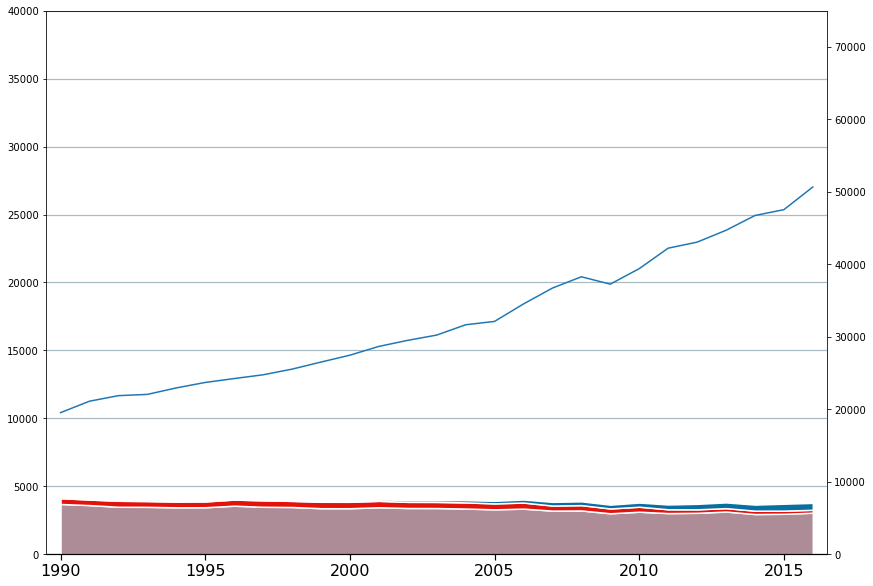

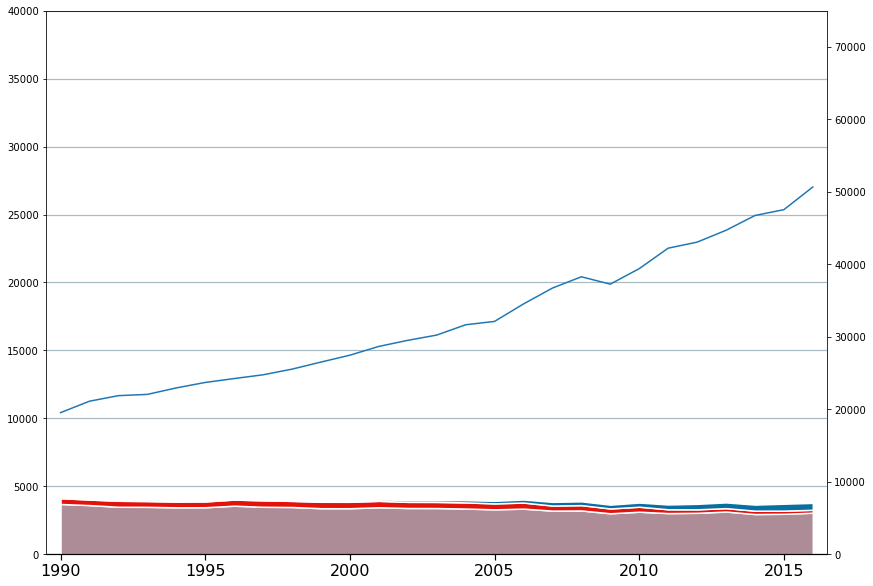

In [47]:
COLORS = [BROWN,RED,BLUE]
years = merge5_df['year'].unique()
consumptions = [merge5_df['fossil_consumption'][merge5_df['country_x']=='Germany'],
                merge5_df['nuclear_consumption'][merge5_df['country_x']=='Germany'],
                merge5_df['renewables_consumption'][merge5_df['country_x']=='Germany']]
gdp = merge5_df['gdp_per_capita'][merge5_df['country_x']=='Germany']

# Initialize plot ------------------------------------------
fig, ax= plt.subplots(figsize=(14, 10))

# Add stacked area
ax.stackplot(years, consumptions, colors=COLORS, lw=1.5, edgecolor='white')
# Customize y-axis ticks
#ax.yaxis.set_ticks([i * 1000000 for i in range(0, 7)])
#ax.yaxis.set_ticklabels([i * 50 for i in range(0, 7)])
#ax.yaxis.set_tick_params(labelleft=False, length=0)

# Customize x-axis ticks
ax.xaxis.set_ticks([1990, 1995, 2000, 2005,2010,2015])
ax.xaxis.set_ticklabels([1990, 1995, 2000, 2005, 2010,2015], fontsize=16, fontfamily="Econ Sans Cnd", fontweight=100)
ax.xaxis.set_tick_params(length=6, width=1.2)

# Make gridlines be below most artists.
ax.set_axisbelow(True)

# Add grid lines
ax.grid(axis = "y", color="#A8BAC4", lw=1.2)

# Remove all spines but the one in the bottom
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)

# Customize bottom spine
ax.spines["bottom"].set_lw(1.2)
ax.spines["bottom"].set_capstyle("butt")

# Specify both horizontal and vertical limits
ax.set_ylim(0, 40000)
ax.set_xlim(1989.5, 2016.5)

#GDP Linegraph
ax2 = ax.twinx()
ax2 .plot(years, gdp)
ax2.set_ylim(0,75000)



fig
